In [2]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
import glob
import cv2
!pwd

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
from sklearn.model_selection import train_test_split

In [34]:
images = []
labels = []
for path in glob.glob("/home/vineet/English/Img/GoodImg/Bmp/Sample*"):
#     print(path)
#     for img in glob.glob("/Users/vineet/Desktop/cnn/English/img/GoodImg/Bmp/Sample001/*.png"):
    for img in glob.glob(path+"/*.png"):
#         print(img)
        n= cv2.imread(img)
#         images.append(np.resize(n,(32,32,3)))
        images.append(cv2.resize(n,(32,32)))
        prefix = img.split("/Sample")
        prefix = prefix[1].split("/")
        labels.append(prefix[0])
    

In [35]:
from keras.utils import to_categorical
labels = to_categorical(labels)

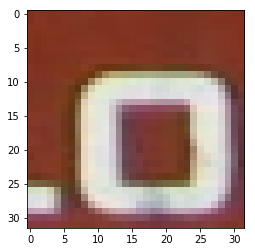

In [36]:
plt.imshow(images[3902])

In [37]:
image3 = images[0:500]
labels1 = labels[0:500] 
image3 = np.array(image3)
image3.shape
images = np.array(images)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33)

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, Dropout
model = Sequential()
model.add(Conv2D(16, kernel_size=(5,5),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size =(4,4), strides = (1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2), strides = (1,1)))
# model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2), strides = (1,1)))
# model.add(MaxPooling2D(pool_size =(2,2), strides = (1,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2), strides = (1,1)))
# model.add(MaxPooling2D(pool_size =(2,2), strides = (1,1)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size =(2,2), strides = (1,1)))
model.add(Flatten())
# model.add(Dropout(0.25))
# model.add(Dense(1024,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(63,activation="softmax"))

In [75]:
# Step 1 - Convolution
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (32, 32, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 62, activation = 'softmax'))

In [76]:
model = classifier
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.fit(X_test,y_test, epochs=5,batch_size=1)

Epoch 1/5
2543/2543 [==============================] - 16s 6ms/step - loss: 15.8456 - acc: 0.0169
Epoch 2/5
2543/2543 [==============================] - 14s 6ms/step - loss: 15.8456 - acc: 0.0169
Epoch 3/5
2543/2543 [==============================] - 16s 6ms/step - loss: 15.8456 - acc: 0.0169
Epoch 4/5
2543/2543 [==============================] - 14s 6ms/step - loss: 15.8456 - acc: 0.0169
Epoch 5/5
2543/2543 [==============================] - 14s 6ms/step - loss: 15.8456 - acc: 0.0169


In [69]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 6, 6, 64)          0         
__________

In [77]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/home/vineet/English/Img/GoodImg/Bmp/',
                                                 target_size = (32,
                                                 32),
                                                 batch_size = 16,
                                                 class_mode =
                                                     'categorical')
test_set = test_datagen.flow_from_directory('/home/vineet/English/Img/GoodImg/Bmp/',
                                            target_size = (32, 32),
                                            batch_size = 16,
                                            class_mode =
                                                 'categorical')

Found 7705 images belonging to 62 classes.
Found 7705 images belonging to 62 classes.


In [83]:
history = classifier.fit_generator(training_set,
                                   steps_per_epoch = 100,
                                   epochs = 25,
                                   )

Epoch 1/25
100/100 [==============================] - 1s 12ms/step - loss: 1.4369 - acc: 0.6223
Epoch 2/25
100/100 [==============================] - 1s 12ms/step - loss: 1.4990 - acc: 0.6081
Epoch 3/25
100/100 [==============================] - 1s 12ms/step - loss: 1.3614 - acc: 0.6219
Epoch 4/25
100/100 [==============================] - 1s 12ms/step - loss: 1.4101 - acc: 0.6206
Epoch 5/25
100/100 [==============================] - 1s 12ms/step - loss: 1.4219 - acc: 0.6194
Epoch 6/25
100/100 [==============================] - 1s 14ms/step - loss: 1.4529 - acc: 0.6350
Epoch 7/25
100/100 [==============================] - 1s 14ms/step - loss: 1.4519 - acc: 0.6194
Epoch 8/25
100/100 [==============================] - 1s 14ms/step - loss: 1.4091 - acc: 0.6206
Epoch 9/25
100/100 [==============================] - 1s 13ms/step - loss: 1.4875 - acc: 0.6181
Epoch 10/25
100/100 [==============================] - 1s 14ms/step - loss: 1.5448 - acc: 0.6038
Epoch 11/25
100/100 [==================

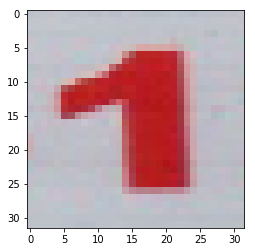

In [120]:
from keras.preprocessing import image
img = image.load_img('/home/vineet/English/Img/GoodImg/Bmp/Sample002/img002-00055.png',target_size=(32,32))
plt.imshow(img)
img = np.expand_dims(img, axis=0)

# img.shape
# plt.imshow(training_set[0][0])

In [116]:
classifier.predict(img)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [118]:
classifier.evaluate_generator(test_set,steps = 100)

[0.9273290312290192, 0.74]